# Connect Intensive - Machine Learning Nanodegree

## Week 11. Image Classification using CNN

### Objectives    

  - Build convolutional neural network to classify images from the CIFAR-10 dataset
  
### Prerequisites
  - [numpy](http://www.scipy.org/scipylib/download.html)  
  - [matplotlib](http://matplotlib.org/index.html)  
  - [tensorflow](https://www.tensorflow.org)
  - [keras](https://keras.io) 
  - [sklearn](http://scikit-learn.org/stable/index.html)  
  - [seaborn](https://seaborn.pydata.org)  
  
### Installation  
If you haven't installed TensorFlow and Keras, run the commands below for installation:  
  - Install TensorFlow: `pip install tensorflow` (or `conda install tensorflow` if you use Anaconda distribution). Note that TensorFlow supports Python 3.5.x and 3.6.x on Windows.   
  - Install Keras: `pip install keras` (or `conda install -c conda-forge keras` if you use Anaconda distribution). Note that the installation of Keras requires either tensorflow or theano installation.


---

### About CIFAR Data

In this project, you'll classify images from the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html). The dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class. 

Here are the classes in the dataset, as well as 10 random images from each. The classes include airplanes, dogs, cats, and other objects. 

<img src="./imgs/CIFAR.png", width=600px>


### Set Up

In [1]:
# Import all modules
import time
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras import backend as K
if K.backend()=='tensorflow':
    K.set_image_dim_ordering("th")
    
import tensorflow as tf
import multiprocessing as mp
 
# Loading the CIFAR-10 datasets
from keras.datasets import cifar10

Using TensorFlow backend.


As a good practice suggests, we need to declare our variables:

- `batch_size` – the number of training examples in one forward/backward pass. The higher the batch size, the more memory space you’ll need  
- `num_classes` – number of cifar-10 data set classes  
- `one epoch` – one forward pass and one backward pass of all the training examples  

In [2]:
# Declare variables
batch_size = 32 
# 32 examples in a mini-batch, smaller batch size means more updates in one epoch
 
num_classes = 10 #
epochs = 10 # repeat 100 times

### Get Data

Next, we can load the CIFAR-10 data set.

In [3]:
# x_train - training data(images), y_train - labels(digits)
(x_train, y_train), (x_test, y_test) = cifar10.load_data() 

Now we can take a look at the images from each class in the CIFAR-10 dataset using the code below.

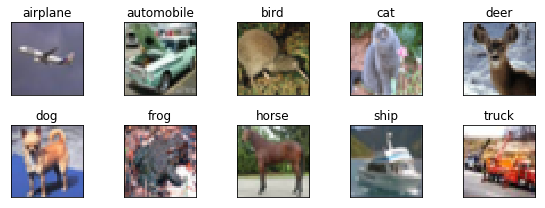

In [4]:
# show figure with 10 random images from each class
fig = plt.figure(figsize=(8, 3))
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = np.transpose(features_idx[img_num,::],(1,2,0))
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.tight_layout()

### Normalize Data

The pixel values are in the range of 0 to 255 for each of the red, green and blue channels. It’s good practice to work with normalized data. Because the input values are well understood, we can easily normalize to the range 0 to 1 (inclusive) by dividing each value by the maximum observation which is 255.

*Note*, the data is loaded as integers, so we must cast it to floating point values in order to perform the division since we are working with Python 2.

The output variables are defined as a vector of integers from 0 to 1 for each class.

In [5]:
# Convert and pre-processing
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train  /= 255
x_test /= 255

### Build the Network

To build our CNN (Convolutional Neural Networks)  we will use Keras. As introduced in last session, Keras is an open source neural network Python library which can run on top of other machine learning libraries like TensorFlow, CNTK or Theano. It allows for an easy and fast prototyping, supports convolutional,  recurrent neural networks and a combination of the two.

We will use a model with two convolutional layers followed by max pooling, attached with a fully connected layer to make predictions:

- Convolutional input layer, 16 filters with a size of 3×3, a relu activation function
- Max Pool layer with size 2×2
- Convolutional input layer, 32 filters with a size of 3×3, a relu activation function
- Max Pool layer with size 2×2
- Global average pooling layer  
- Fully connected output layer with 10 units and a softmax activation function  

In [6]:
model = Sequential()
model.add(Conv2D(16, (3, 3), padding='same', input_shape=x_train.shape[1:], activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(GlobalAveragePooling2D())
model.add(Dense(num_classes, activation='softmax'))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 16, 32, 32)        448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 16, 16)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 8, 8)          0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 5,418
Trainable params: 5,418
Non-trainable params: 0
_________________________________________________________________
None


### Compile the Model

In [7]:
sgd = SGD(lr = 0.1, decay=1e-6, momentum=0.9, nesterov=True) # optimizer
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

### Train the Model

In [8]:
# Train model
model_fitted = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 87s - loss: 1.8230 - acc: 0.3124 - val_loss: 1.6971 - val_acc: 0.3844
Epoch 2/10
50000/50000 [==============================] - 90s - loss: 1.5023 - acc: 0.4559 - val_loss: 1.4699 - val_acc: 0.4801
Epoch 3/10
50000/50000 [==============================] - 87s - loss: 1.4036 - acc: 0.4952 - val_loss: 1.3365 - val_acc: 0.5238
Epoch 4/10
50000/50000 [==============================] - 89s - loss: 1.3521 - acc: 0.5159 - val_loss: 1.3516 - val_acc: 0.5148
Epoch 5/10
50000/50000 [==============================] - 90s - loss: 1.3139 - acc: 0.5295 - val_loss: 1.3359 - val_acc: 0.5175
Epoch 6/10
50000/50000 [==============================] - 96s - loss: 1.2887 - acc: 0.5414 - val_loss: 1.3218 - val_acc: 0.5193
Epoch 7/10
50000/50000 [==============================] - 103s - loss: 1.2654 - acc: 0.5496 - val_loss: 1.2770 - val_acc: 0.5478
Epoch 8/10
50000/50000 [=============================

After training process, we can see loss and accuracy on plots using the code below:

### Evaluate the Model

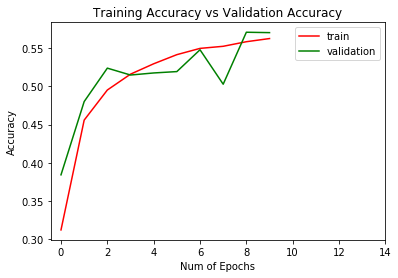

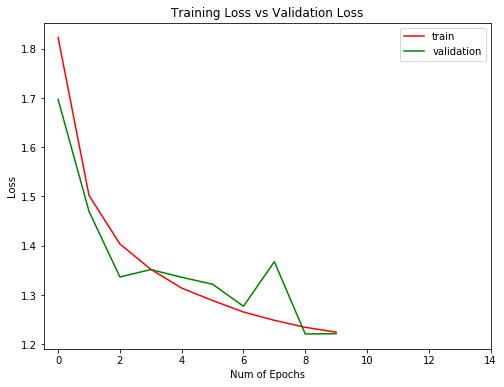

In [9]:
# Plots for training and testing process: loss and accuracy
plt.figure(0)
plt.plot(model_fitted.history['acc'],'r')
plt.plot(model_fitted.history['val_acc'],'g')
plt.xticks(np.arange(0, 15, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel('Num of Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy vs Validation Accuracy')
plt.legend(['train', 'validation'])
 
plt.figure(1)
plt.plot(model_fitted.history['loss'],'r')
plt.plot(model_fitted.history['val_loss'],'g')
plt.xticks(np.arange(0, 15, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel('Num of Epochs')
plt.ylabel('Loss')
plt.title('Training Loss vs Validation Loss')
plt.legend(['train', 'validation'])

In [10]:
# confusion matrix
 
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict(x_test, verbose=2)
y_pred = np.argmax(Y_pred, axis=1)

(0, 1000)
(1, 1000)
(2, 1000)
(3, 1000)
(4, 1000)
(5, 1000)
(6, 1000)
(7, 1000)
(8, 1000)
(9, 1000)
[[579  42  46  15   3   9  18  13 162 113]
 [ 17 639   3   5   2   4   6   5  37 282]
 [ 73  12 323 123 147  57 142  44  49  30]
 [ 23  26  43 392  49 153 128  42  45  99]
 [ 34   5  56  77 473  44 125 123  31  32]
 [ 18  19  31 224  68 438  38  67  49  48]
 [  6   9  23  86  71  12 736  12  17  28]
 [ 21  15  17  46  93  73  18 574  19 124]
 [115  44   4   8   7   9   8   4 721  80]
 [ 18  84   3  11   5   2   5  11  34 827]]


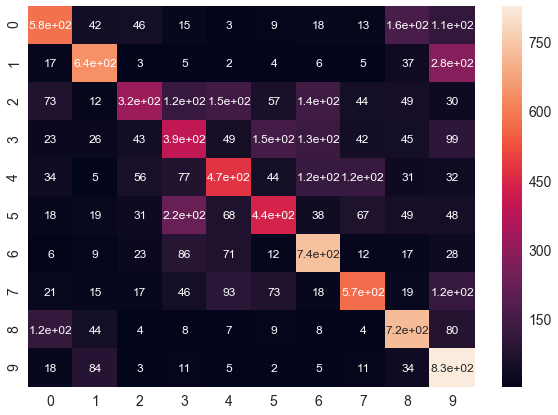

In [11]:
for ix in range(10):
    print(ix, confusion_matrix(np.argmax(y_test,axis=1), y_pred)[ix].sum())
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
print(cm)
 
# Visualizing of confusion matrix
import seaborn as sns
import pandas  as pd

df_cm = pd.DataFrame(cm, range(10), range(10))
plt.figure(figsize = (10, 7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True, annot_kws={'size': 12})# font size

### EXERCISE 

Can you improve the accuracy?